In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [4]:
a = make_array(1,3,5,7,9)
percentile(80, a)

7

In [18]:
sf = Table.read_table('../Data/san_francisco_2015.csv').select('Organization Group', 'Job', 'Total Compensation')
sf.show(3)
np.median(sf.column(2))

Organization Group,Job,Total Compensation
"Public Works, Transportation & Commerce",Water Qualitytech I/II,117767
"Public Works, Transportation & Commerce",Soft Floor Coverer,41209.8
Community Health,Health Care Billing Clerk 2,110561


98174.9

In [19]:
sample_from_population = sf.sample(200, with_replacement=False)
sample_from_population.show(3)

Organization Group,Job,Total Compensation
Community Health,Clinical Psychologist,114055
"Public Works, Transportation & Commerce",Transit Operator,149472
Public Protection,EMT/Paramedic/Firefighter,217814


In [20]:
np.median(sample_from_population.column(2))

110917.555

In [33]:
resample = sample_from_population.sample()
np.median(resample.column(2))

112283.91

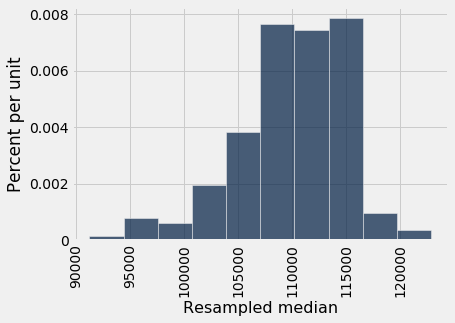

In [35]:
medians = []
for i in np.arange(1000):
    resample = sample_from_population.sample()
    median = np.median(resample.column(2))
    medians.append(median)
    
Table().with_column('Resampled median', medians).hist()

In [36]:
percentile(2.5, medians)

96970.815

In [37]:
percentile(97.5, medians)

117083.08

In [39]:
real_median = np.median(sf.column(2))
real_median

98174.9

In [40]:
intervals = Table(['Lower', 'Upper'])
intervals

Lower,Upper


In [43]:
for j in np.arange(100):
    sample_from_population = sf.sample(200, with_replacement=False)
    medians = []
    for i in np.arange(1000):
        resample = sample_from_population.sample()
        median = np.median(resample.column(2))
        medians.append(median)
        
    interval_95 = [percentile(2.5, medians), percentile(97.5, medians)]
    intervals.append(interval_95)

In [44]:
intervals.show(3)

Lower,Upper
82728.3,105766
83224.7,109120
97040.3,116503


In [45]:
truth = np.median(sf.column(2))
correct = intervals.where('Lower', are.not_above(truth)).where('Upper', are.not_below(truth))
correct.num_rows

97

In [48]:
intervals.where('Lower', are.above(truth))

Lower,Upper
98942.5,113169


In [49]:
intervals.where('Upper', are.below(truth))

Lower,Upper
56394.1,94305
74026.8,96759.7


In [51]:
births = Table.read_table('../Data/baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [52]:
babies = births.select(0, 1)
babies

Birth Weight,Gestational Days
120,284
113,282
128,279
108,282
136,286
138,244
132,245
120,289
143,299
140,351


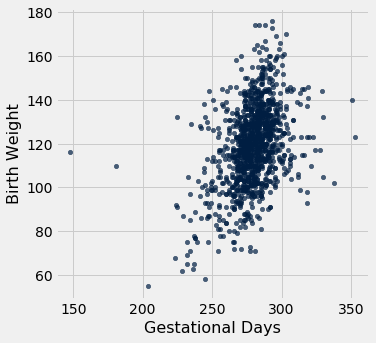

In [53]:
babies.scatter(1, 0)

In [54]:
ratios = babies.with_column(
    'Ratio BW/GD', babies.column(0)/babies.column(1))
ratios

Birth Weight,Gestational Days,Ratio BW/GD
120,284,0.422535
113,282,0.400709
128,279,0.458781
108,282,0.382979
136,286,0.475524
138,244,0.565574
132,245,0.538776
120,289,0.415225
143,299,0.478261
140,351,0.39886


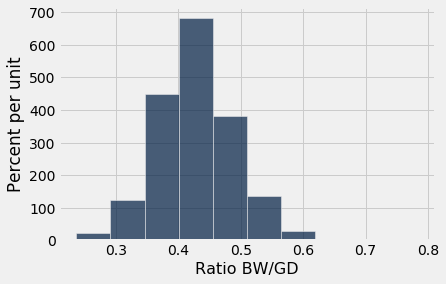

In [55]:
ratios.hist('Ratio BW/GD')

In [56]:
np.median(ratios.column(2))

0.42907801418439717

[0.4254545454545455, 0.4326241134751773]


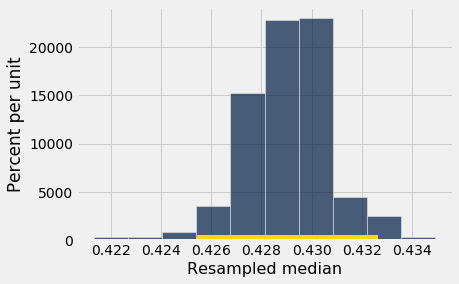

In [57]:
resampled_medians = []
for i in np.arange(1000):
    resample = ratios.sample()
    median = np.median(resample.column(2))
    resampled_medians.append(median)
    
interval_95 = [percentile(2.5, resampled_medians), percentile(97.5, resampled_medians)]
print(interval_95)

Table().with_column('Resampled median', resampled_medians).hist(0)
plt.plot(interval_95, [0,0], color='gold', lw=10)